# 1. Linear regression

## 1.1 기존의 프로그램 방식.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 섭씨온도(인풋 데이터)를 받아 화씨온도(target(label) 데이터)로 출력

In [3]:
def celsius_to_faherenheit(x):
    return x * 1.8 + 32

In [4]:
input_c = int(input("섭씨온도는 "))
print("화씨온도는 ", celsius_to_faherenheit(input_c))

섭씨온도는 11
화씨온도는  51.8


## 1.2 머신러닝 프로그램 방식.
- 1. 데티어 확보 및 생성.
- 2. 데이터 전처리 : 훈련데이터셋, 검증데이터셋, 테스트(시험) 데이터셋, ...
- 3. 모델 구성.
- 4. 모델 학습과정 설정
- 5. 모델 학습 시키기
- 6. 모델 평가(시험데이터 셋으로)
- 7. 모델 사용(입력값을 주어서 예측값을 받기)

In [5]:
# 1. 데이터 확보 
data_C = np.array (range(100))
data_C # 입력값

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F # target 데이터.

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 2. 컴퓨터에게 학습시키기 위해서 nomalize함 (전체의 편차를 줄이는 작업.)
#  이상적인 편차 : 0 ~ 1
scaled_data_C = data_C/100.0
scaled_data_F = data_F/100.0
print(scaled_data_C, end='\n\n')
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [8]:
# 모델 만들때 필요한.
from tensorflow.keras.models import Sequential # 모델 생성
from tensorflow.keras.layers import Dense # 입력값과 출력값

In [9]:
# 3. 모델 구성하기
model = Sequential() # 빈 객체만 생성됨.
model.add(Dense(1, input_dim=1)) # 빈객체 안 데이터 기입
# input_dim =1 : 톡립변수 1개, target데이터 1개.

# 4. 모델 학습과정 설정. metrics=['mae'] loss 보고싶을때.
model.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# 학습전 예측.
print(model.predict([1]))

[[-0.8927707]]


In [11]:
model.save('model/befor_learning.h5')# 모델 저장.

In [12]:
# 4. 모델 학습시키기.# 넘파이배열로 들어가야한다.
#epochs=1000 작동할 횟수. verbose=0 은 아예안나온다. loss를 출력할지 말지 
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2) 

Epoch 1/1000
4/4 - 0s - loss: 3.3218 - mae: 1.6487
Epoch 2/1000
4/4 - 0s - loss: 3.2802 - mae: 1.6373
Epoch 3/1000
4/4 - 0s - loss: 3.2519 - mae: 1.6293
Epoch 4/1000
4/4 - 0s - loss: 3.2285 - mae: 1.6227
Epoch 5/1000
4/4 - 0s - loss: 3.2069 - mae: 1.6165
Epoch 6/1000
4/4 - 0s - loss: 3.1848 - mae: 1.6103
Epoch 7/1000
4/4 - 0s - loss: 3.1635 - mae: 1.6042
Epoch 8/1000
4/4 - 0s - loss: 3.1431 - mae: 1.5983
Epoch 9/1000
4/4 - 0s - loss: 3.1242 - mae: 1.5929
Epoch 10/1000
4/4 - 0s - loss: 3.1027 - mae: 1.5867
Epoch 11/1000
4/4 - 0s - loss: 3.0835 - mae: 1.5811
Epoch 12/1000
4/4 - 0s - loss: 3.0630 - mae: 1.5752
Epoch 13/1000
4/4 - 0s - loss: 3.0445 - mae: 1.5698
Epoch 14/1000
4/4 - 0s - loss: 3.0226 - mae: 1.5634
Epoch 15/1000
4/4 - 0s - loss: 3.0020 - mae: 1.5574
Epoch 16/1000
4/4 - 0s - loss: 2.9811 - mae: 1.5513
Epoch 17/1000
4/4 - 0s - loss: 2.9618 - mae: 1.5455
Epoch 18/1000
4/4 - 0s - loss: 2.9407 - mae: 1.5394
Epoch 19/1000
4/4 - 0s - loss: 2.9215 - mae: 1.5337
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.8911 - mae: 0.7750
Epoch 159/1000
4/4 - 0s - loss: 0.8813 - mae: 0.7705
Epoch 160/1000
4/4 - 0s - loss: 0.8726 - mae: 0.7665
Epoch 161/1000
4/4 - 0s - loss: 0.8630 - mae: 0.7621
Epoch 162/1000
4/4 - 0s - loss: 0.8542 - mae: 0.7578
Epoch 163/1000
4/4 - 0s - loss: 0.8439 - mae: 0.7529
Epoch 164/1000
4/4 - 0s - loss: 0.8346 - mae: 0.7486
Epoch 165/1000
4/4 - 0s - loss: 0.8266 - mae: 0.7447
Epoch 166/1000
4/4 - 0s - loss: 0.8177 - mae: 0.7407
Epoch 167/1000
4/4 - 0s - loss: 0.8073 - mae: 0.7356
Epoch 168/1000
4/4 - 0s - loss: 0.7977 - mae: 0.7310
Epoch 169/1000
4/4 - 0s - loss: 0.7894 - mae: 0.7271
Epoch 170/1000
4/4 - 0s - loss: 0.7832 - mae: 0.7239
Epoch 171/1000
4/4 - 0s - loss: 0.7748 - mae: 0.7200
Epoch 172/1000
4/4 - 0s - loss: 0.7670 - mae: 0.7161
Epoch 173/1000
4/4 - 0s - loss: 0.7585 - mae: 0.7121
Epoch 174/1000
4/4 - 0s - loss: 0.7490 - mae: 0.7075
Epoch 175/1000
4/4 - 0s - loss: 0.7401 - mae: 0.7030
Epoch 176/1000
4/4 - 0s - loss: 0.7316 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.1901 - mae: 0.3776
Epoch 314/1000
4/4 - 0s - loss: 0.1890 - mae: 0.3765
Epoch 315/1000
4/4 - 0s - loss: 0.1881 - mae: 0.3755
Epoch 316/1000
4/4 - 0s - loss: 0.1873 - mae: 0.3748
Epoch 317/1000
4/4 - 0s - loss: 0.1864 - mae: 0.3738
Epoch 318/1000
4/4 - 0s - loss: 0.1858 - mae: 0.3733
Epoch 319/1000
4/4 - 0s - loss: 0.1852 - mae: 0.3727
Epoch 320/1000
4/4 - 0s - loss: 0.1843 - mae: 0.3718
Epoch 321/1000
4/4 - 0s - loss: 0.1838 - mae: 0.3712
Epoch 322/1000
4/4 - 0s - loss: 0.1831 - mae: 0.3705
Epoch 323/1000
4/4 - 0s - loss: 0.1822 - mae: 0.3696
Epoch 324/1000
4/4 - 0s - loss: 0.1813 - mae: 0.3686
Epoch 325/1000
4/4 - 0s - loss: 0.1804 - mae: 0.3677
Epoch 326/1000
4/4 - 0s - loss: 0.1798 - mae: 0.3672
Epoch 327/1000
4/4 - 0s - loss: 0.1788 - mae: 0.3660
Epoch 328/1000
4/4 - 0s - loss: 0.1781 - mae: 0.3653
Epoch 329/1000
4/4 - 0s - loss: 0.1776 - mae: 0.3648
Epoch 330/1000
4/4 - 0s - loss: 0.1768 - mae: 0.3639
Epoch 331/1000
4/4 - 0s - loss: 0.1759 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0862 - mae: 0.2534
Epoch 469/1000
4/4 - 0s - loss: 0.0857 - mae: 0.2526
Epoch 470/1000
4/4 - 0s - loss: 0.0852 - mae: 0.2518
Epoch 471/1000
4/4 - 0s - loss: 0.0848 - mae: 0.2511
Epoch 472/1000
4/4 - 0s - loss: 0.0843 - mae: 0.2504
Epoch 473/1000
4/4 - 0s - loss: 0.0838 - mae: 0.2496
Epoch 474/1000
4/4 - 0s - loss: 0.0833 - mae: 0.2490
Epoch 475/1000
4/4 - 0s - loss: 0.0829 - mae: 0.2482
Epoch 476/1000
4/4 - 0s - loss: 0.0823 - mae: 0.2474
Epoch 477/1000
4/4 - 0s - loss: 0.0816 - mae: 0.2464
Epoch 478/1000
4/4 - 0s - loss: 0.0811 - mae: 0.2458
Epoch 479/1000
4/4 - 0s - loss: 0.0805 - mae: 0.2448
Epoch 480/1000
4/4 - 0s - loss: 0.0799 - mae: 0.2439
Epoch 481/1000
4/4 - 0s - loss: 0.0793 - mae: 0.2431
Epoch 482/1000
4/4 - 0s - loss: 0.0786 - mae: 0.2420
Epoch 483/1000
4/4 - 0s - loss: 0.0781 - mae: 0.2412
Epoch 484/1000
4/4 - 0s - loss: 0.0776 - mae: 0.2405
Epoch 485/1000
4/4 - 0s - loss: 0.0770 - mae: 0.2394
Epoch 486/1000
4/4 - 0s - loss: 0.0764 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0204 - mae: 0.1233
Epoch 624/1000
4/4 - 0s - loss: 0.0202 - mae: 0.1226
Epoch 625/1000
4/4 - 0s - loss: 0.0199 - mae: 0.1217
Epoch 626/1000
4/4 - 0s - loss: 0.0197 - mae: 0.1209
Epoch 627/1000
4/4 - 0s - loss: 0.0194 - mae: 0.1200
Epoch 628/1000
4/4 - 0s - loss: 0.0191 - mae: 0.1194
Epoch 629/1000
4/4 - 0s - loss: 0.0189 - mae: 0.1186
Epoch 630/1000
4/4 - 0s - loss: 0.0187 - mae: 0.1178
Epoch 631/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1172
Epoch 632/1000
4/4 - 0s - loss: 0.0182 - mae: 0.1165
Epoch 633/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1157
Epoch 634/1000
4/4 - 0s - loss: 0.0177 - mae: 0.1148
Epoch 635/1000
4/4 - 0s - loss: 0.0175 - mae: 0.1141
Epoch 636/1000
4/4 - 0s - loss: 0.0172 - mae: 0.1133
Epoch 637/1000
4/4 - 0s - loss: 0.0170 - mae: 0.1125
Epoch 638/1000
4/4 - 0s - loss: 0.0167 - mae: 0.1115
Epoch 639/1000
4/4 - 0s - loss: 0.0164 - mae: 0.1105
Epoch 640/1000
4/4 - 0s - loss: 0.0161 - mae: 0.1095
Epoch 641/1000
4/4 - 0s - loss: 0.0158 - mae: 

Epoch 776/1000
4/4 - 0s - loss: 3.1898e-05 - mae: 0.0049
Epoch 777/1000
4/4 - 0s - loss: 2.6131e-05 - mae: 0.0043
Epoch 778/1000
4/4 - 0s - loss: 1.9002e-05 - mae: 0.0038
Epoch 779/1000
4/4 - 0s - loss: 1.3138e-05 - mae: 0.0031
Epoch 780/1000
4/4 - 0s - loss: 9.1776e-06 - mae: 0.0026
Epoch 781/1000
4/4 - 0s - loss: 6.2472e-06 - mae: 0.0021
Epoch 782/1000
4/4 - 0s - loss: 3.8402e-06 - mae: 0.0016
Epoch 783/1000
4/4 - 0s - loss: 2.1516e-06 - mae: 0.0013
Epoch 784/1000
4/4 - 0s - loss: 1.3374e-06 - mae: 9.8115e-04
Epoch 785/1000
4/4 - 0s - loss: 6.0890e-07 - mae: 6.5650e-04
Epoch 786/1000
4/4 - 0s - loss: 3.7196e-07 - mae: 5.0058e-04
Epoch 787/1000
4/4 - 0s - loss: 1.1283e-06 - mae: 0.0010
Epoch 788/1000
4/4 - 0s - loss: 8.4588e-08 - mae: 2.4519e-04
Epoch 789/1000
4/4 - 0s - loss: 8.5871e-07 - mae: 9.0490e-04
Epoch 790/1000
4/4 - 0s - loss: 1.0882e-06 - mae: 9.7148e-04
Epoch 791/1000
4/4 - 0s - loss: 1.8352e-07 - mae: 4.1831e-04
Epoch 792/1000
4/4 - 0s - loss: 1.1407e-07 - mae: 3.2494e-04

Epoch 913/1000
4/4 - 0s - loss: 5.7784e-07 - mae: 7.4451e-04
Epoch 914/1000
4/4 - 0s - loss: 6.6195e-07 - mae: 7.9755e-04
Epoch 915/1000
4/4 - 0s - loss: 3.0870e-07 - mae: 5.4578e-04
Epoch 916/1000
4/4 - 0s - loss: 4.5158e-07 - mae: 6.5757e-04
Epoch 917/1000
4/4 - 0s - loss: 3.0537e-07 - mae: 5.2006e-04
Epoch 918/1000
4/4 - 0s - loss: 9.4290e-07 - mae: 9.4508e-04
Epoch 919/1000
4/4 - 0s - loss: 6.5065e-07 - mae: 7.8841e-04
Epoch 920/1000
4/4 - 0s - loss: 5.8753e-07 - mae: 7.5303e-04
Epoch 921/1000
4/4 - 0s - loss: 1.8198e-07 - mae: 4.1392e-04
Epoch 922/1000
4/4 - 0s - loss: 6.7412e-07 - mae: 7.8784e-04
Epoch 923/1000
4/4 - 0s - loss: 3.5436e-07 - mae: 5.6582e-04
Epoch 924/1000
4/4 - 0s - loss: 1.1874e-06 - mae: 0.0011
Epoch 925/1000
4/4 - 0s - loss: 5.0448e-07 - mae: 6.7939e-04
Epoch 926/1000
4/4 - 0s - loss: 2.2294e-07 - mae: 4.6103e-04
Epoch 927/1000
4/4 - 0s - loss: 4.0608e-07 - mae: 6.1202e-04
Epoch 928/1000
4/4 - 0s - loss: 1.3402e-06 - mae: 0.0011
Epoch 929/1000
4/4 - 0s - loss: 

In [13]:
# hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=1) 

In [14]:
# 딕셔너리 타입.
hist.history.keys()

dict_keys(['loss', 'mae'])

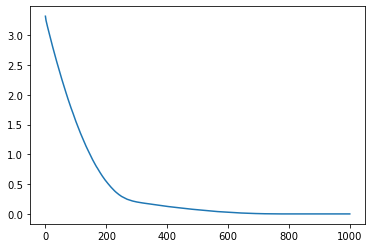

In [15]:
plt.plot(hist.history['loss'])
plt.show()

In [16]:
model.predict([0.01]) # 넘파이배열로 넣어야하는데 리스트로 들어가면 알아서 바꿔준다

array([[0.3387477]], dtype=float32)

In [17]:
model.predict([0]) # 위아래 결과를 보면 거의 근접하게 도달한것을 볼수 있다.

array([[0.32074183]], dtype=float32)

In [18]:
# 총 두번을 학습시키면
#hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2) 

Epoch 1/1000
4/4 - 0s - loss: 1.2101e-06 - mae: 0.0011
Epoch 2/1000
4/4 - 0s - loss: 3.8007e-07 - mae: 6.0366e-04
Epoch 3/1000
4/4 - 0s - loss: 6.3336e-07 - mae: 7.7912e-04
Epoch 4/1000
4/4 - 0s - loss: 4.5133e-07 - mae: 6.5796e-04
Epoch 5/1000
4/4 - 0s - loss: 6.2578e-07 - mae: 7.7422e-04
Epoch 6/1000
4/4 - 0s - loss: 4.0349e-07 - mae: 6.2538e-04
Epoch 7/1000
4/4 - 0s - loss: 1.7199e-07 - mae: 3.8286e-04
Epoch 8/1000
4/4 - 0s - loss: 1.7951e-06 - mae: 0.0013
Epoch 9/1000
4/4 - 0s - loss: 3.9551e-08 - mae: 1.9388e-04
Epoch 10/1000
4/4 - 0s - loss: 3.8970e-08 - mae: 1.8651e-04
Epoch 11/1000
4/4 - 0s - loss: 4.6700e-07 - mae: 6.2550e-04
Epoch 12/1000
4/4 - 0s - loss: 1.1088e-06 - mae: 0.0010
Epoch 13/1000
4/4 - 0s - loss: 7.0866e-07 - mae: 7.9473e-04
Epoch 14/1000
4/4 - 0s - loss: 3.6329e-07 - mae: 5.9124e-04
Epoch 15/1000
4/4 - 0s - loss: 2.3413e-07 - mae: 4.6698e-04
Epoch 16/1000
4/4 - 0s - loss: 1.2309e-06 - mae: 0.0011
Epoch 17/1000
4/4 - 0s - loss: 4.7988e-07 - mae: 6.7005e-04
Epoch

Epoch 139/1000
4/4 - 0s - loss: 2.0675e-07 - mae: 4.2612e-04
Epoch 140/1000
4/4 - 0s - loss: 1.1125e-06 - mae: 0.0010
Epoch 141/1000
4/4 - 0s - loss: 2.8962e-07 - mae: 5.2344e-04
Epoch 142/1000
4/4 - 0s - loss: 4.4474e-07 - mae: 6.3834e-04
Epoch 143/1000
4/4 - 0s - loss: 8.0353e-07 - mae: 8.7644e-04
Epoch 144/1000
4/4 - 0s - loss: 6.2496e-07 - mae: 7.7319e-04
Epoch 145/1000
4/4 - 0s - loss: 5.2392e-07 - mae: 7.1058e-04
Epoch 146/1000
4/4 - 0s - loss: 5.9857e-07 - mae: 7.5869e-04
Epoch 147/1000
4/4 - 0s - loss: 6.3915e-07 - mae: 7.8160e-04
Epoch 148/1000
4/4 - 0s - loss: 5.9340e-07 - mae: 7.5152e-04
Epoch 149/1000
4/4 - 0s - loss: 3.1146e-07 - mae: 5.4360e-04
Epoch 150/1000
4/4 - 0s - loss: 9.3266e-07 - mae: 9.4525e-04
Epoch 151/1000
4/4 - 0s - loss: 2.2299e-07 - mae: 4.6351e-04
Epoch 152/1000
4/4 - 0s - loss: 5.8798e-07 - mae: 7.5012e-04
Epoch 153/1000
4/4 - 0s - loss: 1.1367e-06 - mae: 0.0010
Epoch 154/1000
4/4 - 0s - loss: 1.7227e-07 - mae: 4.0576e-04
Epoch 155/1000
4/4 - 0s - loss: 

Epoch 275/1000
4/4 - 0s - loss: 1.9251e-07 - mae: 4.2203e-04
Epoch 276/1000
4/4 - 0s - loss: 1.2758e-06 - mae: 0.0011
Epoch 277/1000
4/4 - 0s - loss: 3.9017e-07 - mae: 5.9677e-04
Epoch 278/1000
4/4 - 0s - loss: 1.9617e-07 - mae: 4.3148e-04
Epoch 279/1000
4/4 - 0s - loss: 8.1671e-07 - mae: 8.7540e-04
Epoch 280/1000
4/4 - 0s - loss: 7.6217e-07 - mae: 8.4862e-04
Epoch 281/1000
4/4 - 0s - loss: 5.3490e-07 - mae: 7.1093e-04
Epoch 282/1000
4/4 - 0s - loss: 1.9485e-07 - mae: 4.3267e-04
Epoch 283/1000
4/4 - 0s - loss: 7.2012e-07 - mae: 8.2830e-04
Epoch 284/1000
4/4 - 0s - loss: 9.5295e-07 - mae: 9.5043e-04
Epoch 285/1000
4/4 - 0s - loss: 3.2753e-07 - mae: 5.5813e-04
Epoch 286/1000
4/4 - 0s - loss: 3.8896e-07 - mae: 6.0704e-04
Epoch 287/1000
4/4 - 0s - loss: 8.3590e-07 - mae: 8.9615e-04
Epoch 288/1000
4/4 - 0s - loss: 4.8091e-07 - mae: 6.8118e-04
Epoch 289/1000
4/4 - 0s - loss: 5.6509e-07 - mae: 7.3730e-04
Epoch 290/1000
4/4 - 0s - loss: 6.5090e-07 - mae: 7.8987e-04
Epoch 291/1000
4/4 - 0s - lo

Epoch 411/1000
4/4 - 0s - loss: 1.6533e-07 - mae: 3.8493e-04
Epoch 412/1000
4/4 - 0s - loss: 1.5231e-06 - mae: 0.0012
Epoch 413/1000
4/4 - 0s - loss: 3.8092e-07 - mae: 5.9654e-04
Epoch 414/1000
4/4 - 0s - loss: 5.0955e-08 - mae: 2.1958e-04
Epoch 415/1000
4/4 - 0s - loss: 4.2745e-07 - mae: 6.1432e-04
Epoch 416/1000
4/4 - 0s - loss: 1.1437e-06 - mae: 0.0010
Epoch 417/1000
4/4 - 0s - loss: 4.8935e-07 - mae: 6.8219e-04
Epoch 418/1000
4/4 - 0s - loss: 9.6891e-07 - mae: 9.4850e-04
Epoch 419/1000
4/4 - 0s - loss: 1.9697e-07 - mae: 4.3574e-04
Epoch 420/1000
4/4 - 0s - loss: 5.1206e-07 - mae: 6.8965e-04
Epoch 421/1000
4/4 - 0s - loss: 4.2025e-07 - mae: 6.3487e-04
Epoch 422/1000
4/4 - 0s - loss: 7.8838e-07 - mae: 8.6866e-04
Epoch 423/1000
4/4 - 0s - loss: 7.3913e-07 - mae: 8.3214e-04
Epoch 424/1000
4/4 - 0s - loss: 1.4713e-07 - mae: 3.7643e-04
Epoch 425/1000
4/4 - 0s - loss: 6.4858e-07 - mae: 7.8114e-04
Epoch 426/1000
4/4 - 0s - loss: 5.8012e-08 - mae: 2.0848e-04
Epoch 427/1000
4/4 - 0s - loss: 

Epoch 547/1000
4/4 - 0s - loss: 2.2232e-07 - mae: 4.6276e-04
Epoch 548/1000
4/4 - 0s - loss: 3.5982e-07 - mae: 5.8436e-04
Epoch 549/1000
4/4 - 0s - loss: 3.9403e-07 - mae: 6.1087e-04
Epoch 550/1000
4/4 - 0s - loss: 1.0227e-06 - mae: 9.8735e-04
Epoch 551/1000
4/4 - 0s - loss: 1.4951e-07 - mae: 3.6851e-04
Epoch 552/1000
4/4 - 0s - loss: 4.6866e-07 - mae: 6.6603e-04
Epoch 553/1000
4/4 - 0s - loss: 1.2122e-06 - mae: 0.0011
Epoch 554/1000
4/4 - 0s - loss: 4.3555e-07 - mae: 6.4344e-04
Epoch 555/1000
4/4 - 0s - loss: 6.7388e-07 - mae: 7.9498e-04
Epoch 556/1000
4/4 - 0s - loss: 3.5266e-07 - mae: 5.5533e-04
Epoch 557/1000
4/4 - 0s - loss: 5.2913e-07 - mae: 6.8619e-04
Epoch 558/1000
4/4 - 0s - loss: 6.2175e-07 - mae: 7.6848e-04
Epoch 559/1000
4/4 - 0s - loss: 1.1269e-06 - mae: 9.8840e-04
Epoch 560/1000
4/4 - 0s - loss: 7.8865e-08 - mae: 2.7017e-04
Epoch 561/1000
4/4 - 0s - loss: 2.5806e-07 - mae: 4.8163e-04
Epoch 562/1000
4/4 - 0s - loss: 1.0225e-06 - mae: 9.8649e-04
Epoch 563/1000
4/4 - 0s - lo

Epoch 683/1000
4/4 - 0s - loss: 4.4682e-08 - mae: 2.0462e-04
Epoch 684/1000
4/4 - 0s - loss: 1.0450e-07 - mae: 2.9465e-04
Epoch 685/1000
4/4 - 0s - loss: 1.5262e-06 - mae: 0.0012
Epoch 686/1000
4/4 - 0s - loss: 6.5998e-07 - mae: 7.6928e-04
Epoch 687/1000
4/4 - 0s - loss: 1.5334e-07 - mae: 3.8130e-04
Epoch 688/1000
4/4 - 0s - loss: 6.9322e-07 - mae: 8.1239e-04
Epoch 689/1000
4/4 - 0s - loss: 9.4199e-07 - mae: 9.3137e-04
Epoch 690/1000
4/4 - 0s - loss: 2.0482e-07 - mae: 4.3703e-04
Epoch 691/1000
4/4 - 0s - loss: 6.0176e-07 - mae: 7.5260e-04
Epoch 692/1000
4/4 - 0s - loss: 7.6420e-07 - mae: 8.5480e-04
Epoch 693/1000
4/4 - 0s - loss: 5.1737e-07 - mae: 7.0210e-04
Epoch 694/1000
4/4 - 0s - loss: 5.1504e-07 - mae: 6.9597e-04
Epoch 695/1000
4/4 - 0s - loss: 9.4051e-07 - mae: 9.4159e-04
Epoch 696/1000
4/4 - 0s - loss: 3.2448e-07 - mae: 5.4895e-04
Epoch 697/1000
4/4 - 0s - loss: 4.1799e-07 - mae: 6.2856e-04
Epoch 698/1000
4/4 - 0s - loss: 6.2396e-07 - mae: 7.7126e-04
Epoch 699/1000
4/4 - 0s - lo

Epoch 819/1000
4/4 - 0s - loss: 8.1076e-08 - mae: 2.7944e-04
Epoch 820/1000
4/4 - 0s - loss: 2.2058e-07 - mae: 4.4750e-04
Epoch 821/1000
4/4 - 0s - loss: 1.2068e-06 - mae: 0.0011
Epoch 822/1000
4/4 - 0s - loss: 1.0994e-06 - mae: 9.3066e-04
Epoch 823/1000
4/4 - 0s - loss: 3.0801e-08 - mae: 1.5583e-04
Epoch 824/1000
4/4 - 0s - loss: 4.2804e-08 - mae: 1.9353e-04
Epoch 825/1000
4/4 - 0s - loss: 5.9815e-07 - mae: 7.1026e-04
Epoch 826/1000
4/4 - 0s - loss: 1.3748e-06 - mae: 0.0011
Epoch 827/1000
4/4 - 0s - loss: 9.5037e-08 - mae: 2.9273e-04
Epoch 828/1000
4/4 - 0s - loss: 1.9462e-07 - mae: 4.2257e-04
Epoch 829/1000
4/4 - 0s - loss: 1.2089e-06 - mae: 0.0011
Epoch 830/1000
4/4 - 0s - loss: 9.6990e-07 - mae: 9.0496e-04
Epoch 831/1000
4/4 - 0s - loss: 7.4911e-08 - mae: 2.5453e-04
Epoch 832/1000
4/4 - 0s - loss: 1.5578e-07 - mae: 3.7677e-04
Epoch 833/1000
4/4 - 0s - loss: 1.1380e-06 - mae: 0.0010
Epoch 834/1000
4/4 - 0s - loss: 3.2230e-07 - mae: 5.5505e-04
Epoch 835/1000
4/4 - 0s - loss: 3.0438e-

Epoch 955/1000
4/4 - 0s - loss: 3.1181e-07 - mae: 5.4657e-04
Epoch 956/1000
4/4 - 0s - loss: 4.0962e-07 - mae: 6.2229e-04
Epoch 957/1000
4/4 - 0s - loss: 5.6935e-07 - mae: 7.3688e-04
Epoch 958/1000
4/4 - 0s - loss: 1.1736e-06 - mae: 0.0010
Epoch 959/1000
4/4 - 0s - loss: 1.3650e-08 - mae: 9.6346e-05
Epoch 960/1000
4/4 - 0s - loss: 5.7530e-08 - mae: 2.1691e-04
Epoch 961/1000
4/4 - 0s - loss: 1.5687e-06 - mae: 0.0012
Epoch 962/1000
4/4 - 0s - loss: 5.1182e-07 - mae: 6.3936e-04
Epoch 963/1000
4/4 - 0s - loss: 1.2351e-07 - mae: 3.3628e-04
Epoch 964/1000
4/4 - 0s - loss: 4.2057e-07 - mae: 6.1432e-04
Epoch 965/1000
4/4 - 0s - loss: 9.8370e-07 - mae: 9.7104e-04
Epoch 966/1000
4/4 - 0s - loss: 1.0329e-06 - mae: 9.6550e-04
Epoch 967/1000
4/4 - 0s - loss: 5.1008e-08 - mae: 2.1001e-04
Epoch 968/1000
4/4 - 0s - loss: 1.0268e-07 - mae: 2.9705e-04
Epoch 969/1000
4/4 - 0s - loss: 1.3733e-06 - mae: 0.0011
Epoch 970/1000
4/4 - 0s - loss: 4.8301e-07 - mae: 6.5556e-04
Epoch 971/1000
4/4 - 0s - loss: 4.80

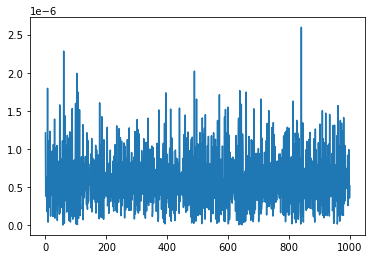

In [19]:
#plt.plot(hist.history['loss'])
#plt.show()

In [18]:
model.save('model/after_learning.h5')# 모델 저장.

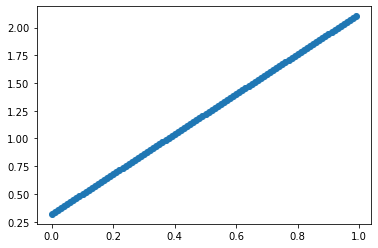

In [19]:
# 노이즈가 있기전 데이터.
plt.scatter(x=scaled_data_C, y=scaled_data_F)

## 1.3 노이즈가 있는 데이터로 실습

In [20]:
# 평균이 0, 표준편차가 0.1인 데이터 100개를 생성.
np.random.seed(703) # 랜덤값의 시드를 고정
noise = np.array(np.random.normal(0, 0.1, 100))
noise_scaled_data_F = scaled_data_F + noise

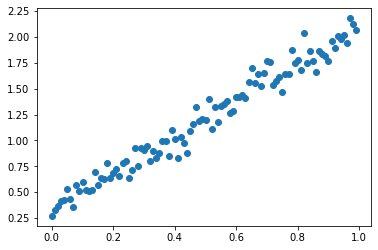

In [21]:
plt.scatter(x=scaled_data_C, y=noise_scaled_data_F)
plt.show()

In [22]:
# 3. 모델 구성
model2 = Sequential() #-> 모델 객체 생성.(Sequential 클래스)
model2.add(Dense(1, input_dim=1)) # 출력값은 1 입력값은 1
# 힉습과정 설정. 오류발생은 학습시킬때 보이니 조심.
model2.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# 넘파이 값으로 들어가야하지만 안넣으면 알아서 해준다.
print(model2.predict(np.array([0.01])))

[[0.00040501]]


In [24]:
# 5. 모델 학습시키기 x값 y값
hist_2 = model2.fit(scaled_data_C, noise_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 1.6516 - mae: 1.1819
Epoch 2/1000
4/4 - 0s - loss: 1.6219 - mae: 1.1702
Epoch 3/1000
4/4 - 0s - loss: 1.6040 - mae: 1.1631
Epoch 4/1000
4/4 - 0s - loss: 1.5869 - mae: 1.1562
Epoch 5/1000
4/4 - 0s - loss: 1.5703 - mae: 1.1497
Epoch 6/1000
4/4 - 0s - loss: 1.5543 - mae: 1.1432
Epoch 7/1000
4/4 - 0s - loss: 1.5395 - mae: 1.1371
Epoch 8/1000
4/4 - 0s - loss: 1.5256 - mae: 1.1315
Epoch 9/1000
4/4 - 0s - loss: 1.5099 - mae: 1.1250
Epoch 10/1000
4/4 - 0s - loss: 1.4960 - mae: 1.1193
Epoch 11/1000
4/4 - 0s - loss: 1.4815 - mae: 1.1133
Epoch 12/1000
4/4 - 0s - loss: 1.4688 - mae: 1.1079
Epoch 13/1000
4/4 - 0s - loss: 1.4554 - mae: 1.1025
Epoch 14/1000
4/4 - 0s - loss: 1.4405 - mae: 1.0963
Epoch 15/1000
4/4 - 0s - loss: 1.4257 - mae: 1.0898
Epoch 16/1000
4/4 - 0s - loss: 1.4124 - mae: 1.0844
Epoch 17/1000
4/4 - 0s - loss: 1.3981 - mae: 1.0782
Epoch 18/1000
4/4 - 0s - loss: 1.3846 - mae: 1.0724
Epoch 19/1000
4/4 - 0s - loss: 1.3714 - mae: 1.0667
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.1867 - mae: 0.3475
Epoch 159/1000
4/4 - 0s - loss: 0.1831 - mae: 0.3446
Epoch 160/1000
4/4 - 0s - loss: 0.1794 - mae: 0.3415
Epoch 161/1000
4/4 - 0s - loss: 0.1758 - mae: 0.3385
Epoch 162/1000
4/4 - 0s - loss: 0.1723 - mae: 0.3356
Epoch 163/1000
4/4 - 0s - loss: 0.1683 - mae: 0.3323
Epoch 164/1000
4/4 - 0s - loss: 0.1656 - mae: 0.3299
Epoch 165/1000
4/4 - 0s - loss: 0.1631 - mae: 0.3279
Epoch 166/1000
4/4 - 0s - loss: 0.1598 - mae: 0.3250
Epoch 167/1000
4/4 - 0s - loss: 0.1570 - mae: 0.3227
Epoch 168/1000
4/4 - 0s - loss: 0.1542 - mae: 0.3203
Epoch 169/1000
4/4 - 0s - loss: 0.1508 - mae: 0.3172
Epoch 170/1000
4/4 - 0s - loss: 0.1474 - mae: 0.3144
Epoch 171/1000
4/4 - 0s - loss: 0.1448 - mae: 0.3120
Epoch 172/1000
4/4 - 0s - loss: 0.1421 - mae: 0.3096
Epoch 173/1000
4/4 - 0s - loss: 0.1392 - mae: 0.3068
Epoch 174/1000
4/4 - 0s - loss: 0.1365 - mae: 0.3046
Epoch 175/1000
4/4 - 0s - loss: 0.1340 - mae: 0.3022
Epoch 176/1000
4/4 - 0s - loss: 0.1315 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0374 - mae: 0.1662
Epoch 314/1000
4/4 - 0s - loss: 0.0371 - mae: 0.1654
Epoch 315/1000
4/4 - 0s - loss: 0.0368 - mae: 0.1647
Epoch 316/1000
4/4 - 0s - loss: 0.0365 - mae: 0.1640
Epoch 317/1000
4/4 - 0s - loss: 0.0362 - mae: 0.1632
Epoch 318/1000
4/4 - 0s - loss: 0.0359 - mae: 0.1624
Epoch 319/1000
4/4 - 0s - loss: 0.0356 - mae: 0.1616
Epoch 320/1000
4/4 - 0s - loss: 0.0353 - mae: 0.1609
Epoch 321/1000
4/4 - 0s - loss: 0.0350 - mae: 0.1602
Epoch 322/1000
4/4 - 0s - loss: 0.0347 - mae: 0.1595
Epoch 323/1000
4/4 - 0s - loss: 0.0344 - mae: 0.1587
Epoch 324/1000
4/4 - 0s - loss: 0.0341 - mae: 0.1580
Epoch 325/1000
4/4 - 0s - loss: 0.0338 - mae: 0.1572
Epoch 326/1000
4/4 - 0s - loss: 0.0335 - mae: 0.1565
Epoch 327/1000
4/4 - 0s - loss: 0.0332 - mae: 0.1557
Epoch 328/1000
4/4 - 0s - loss: 0.0330 - mae: 0.1552
Epoch 329/1000
4/4 - 0s - loss: 0.0327 - mae: 0.1545
Epoch 330/1000
4/4 - 0s - loss: 0.0325 - mae: 0.1538
Epoch 331/1000
4/4 - 0s - loss: 0.0322 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.0106 - mae: 0.0797
Epoch 469/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0796
Epoch 470/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0796
Epoch 471/1000
4/4 - 0s - loss: 0.0105 - mae: 0.0795
Epoch 472/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0792
Epoch 473/1000
4/4 - 0s - loss: 0.0104 - mae: 0.0789
Epoch 474/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0787
Epoch 475/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0785
Epoch 476/1000
4/4 - 0s - loss: 0.0103 - mae: 0.0785
Epoch 477/1000
4/4 - 0s - loss: 0.0102 - mae: 0.0783
Epoch 478/1000
4/4 - 0s - loss: 0.0102 - mae: 0.0782
Epoch 479/1000
4/4 - 0s - loss: 0.0102 - mae: 0.0781
Epoch 480/1000
4/4 - 0s - loss: 0.0101 - mae: 0.0779
Epoch 481/1000
4/4 - 0s - loss: 0.0101 - mae: 0.0778
Epoch 482/1000
4/4 - 0s - loss: 0.0100 - mae: 0.0776
Epoch 483/1000
4/4 - 0s - loss: 0.0100 - mae: 0.0775
Epoch 484/1000
4/4 - 0s - loss: 0.0099 - mae: 0.0773
Epoch 485/1000
4/4 - 0s - loss: 0.0099 - mae: 0.0772
Epoch 486/1000
4/4 - 0s - loss: 0.0099 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 624/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 625/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 626/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 627/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 628/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 629/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 630/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 631/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 632/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 633/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 634/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 635/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 636/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 637/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 638/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 639/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 640/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 641/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 779/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0706
Epoch 780/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 781/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 782/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 783/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 784/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 785/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 786/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 787/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 788/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 789/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 790/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 791/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 792/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 793/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 794/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 795/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 796/1000
4/4 - 0s - loss: 0.0086 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 934/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 935/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 936/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 937/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 938/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0707
Epoch 939/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 940/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 941/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0712
Epoch 942/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 943/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 944/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 945/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0710
Epoch 946/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0708
Epoch 947/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 948/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 949/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 950/1000
4/4 - 0s - loss: 0.0086 - mae: 0.0709
Epoch 951/1000
4/4 - 0s - loss: 0.0086 - mae: 

In [25]:
print(model2.predict(np.array([0.01])))

[[0.35330647]]


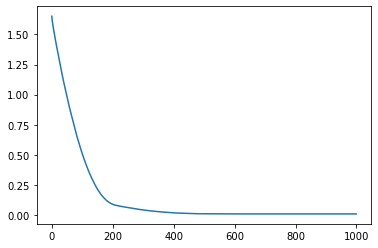

In [27]:
plt.plot(hist_2.history['loss'])
plt.show()

In [28]:
model2.save('model/noise_after_learning.h5')